# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [3]:
# import everything we need
import numpy as np
import pandas as pd

In [4]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [5]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above
df = pd.read_csv("boston.csv")

#feature = df[['label'/feature]]
features = df.drop(['MEDV','Unnamed: 0'],axis=1)
#target var
prices = df['MEDV']

print(features.head())
features.shape

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


(506, 13)

## Model Training

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [7]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
x_train, x_test, y_train, y_test = train_test_split(features,prices, test_size=0.2, random_state = 42)
print("X train \n {}".format(x_train.head()))
print("Y train \n {}".format(y_train.head()))

X train 
          CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15      21.0  395.62   8.47  
332     16.9  362.25   7.83  
423     20.2    2.52  23.29  
19      21.0  390.95  11.28  
Y train 
 477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
Name: MEDV, dtype: float64


In [8]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


In [9]:
# We need 2D arrays for x_train 


In [10]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

#dfit out linear model to train set data.
linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data. 13 features

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [19]:
df1_prediction = linReg.predict([[0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0,18.7, 394.63 , 2.94]])
print(df1_prediction)  #altnerative to below??

[29.13333934]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
import numpy as np
#MAnual way of calculating
x = np.array([0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94])
y_manual = linReg.intercept_ + np.dot(linReg.coef_, x)
print(y_manual)

29.133339344043698


# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [21]:
# we can see the coefficient and intercept our model finds
print(linReg.intercept_)
print(linReg.coef_)
print("----------------")

from sklearn.metrics import r2_score

y_pred = linReg.predict(x_test)
print('r2_score: ',r2_score(y_test, y_pred))
#compare value wiht lnReg.score(). is it same as model.score?
print('score: ', linReg.score(x_test, y_test))

30.24675099392366
[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
----------------
r2_score:  0.6687594935356326
score:  0.6687594935356326


In [41]:
#creates a df with values for prediction

new_houses = pd.DataFrame ([
    [0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03],
    [0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94]
], columns=features.columns)

predictions = linReg.predict(new_houses)
print(predictions)

[27.73005393 29.13333934]


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

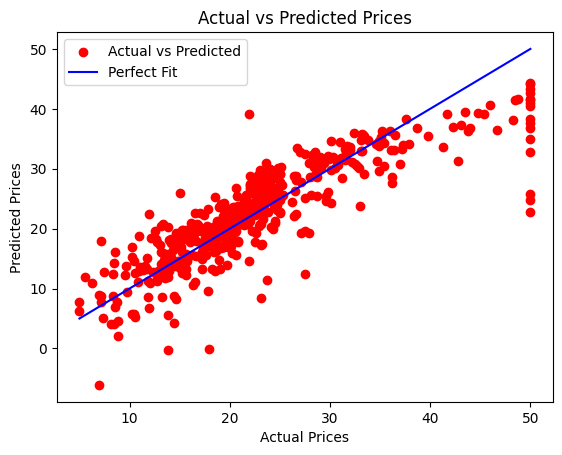

In [33]:
import matplotlib.pyplot as plt

Plot the regression line (blue) vs the actual value (red)

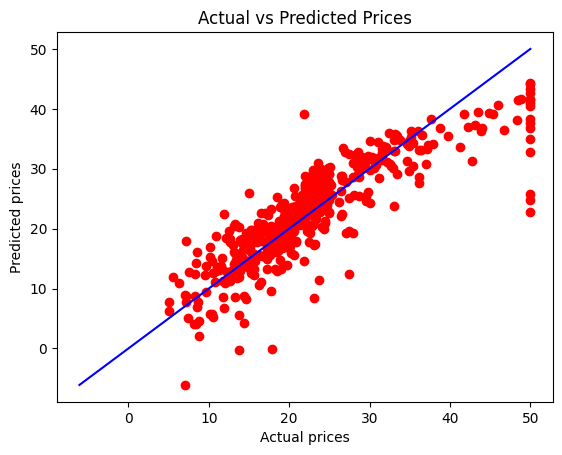

In [ ]:
# We want to plot the regression line(red) vs the actual value(blue)
import matplotlib.pyplot as plt

df2_prediction = linReg.predict(features) #predicted MEDV values from model

#prices is actual MEDV values from dataset
#Plot actual vs predicted values
plt.scatter(prices, df2_prediction, color='red', label='Predicted Values')

#Plot perfect prediction line
min_price= min(prices.min(), df2_prediction.min()) #prices.min gets the smallest actual price in dataset. df2_prediction.min() = the smallest predicted price for model output
#min() picks the smaller of the two values
max_price= max(prices.max(), df2_prediction.max()) 

#x coordinates are actual values, y coordinates are predicted, from bottom left to top right.
plt.plot([min_price, max_price], [min_price, max_price], color='blue', label='Perfect fit or prediction')
plt.xlabel("Actual prices") 
plt.ylabel("Predicted prices")
plt.title('Actual vs Predicted Prices')
plt.show()
